# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    #print(requests.get(city_url))

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =  requests.get(city_url).json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather ['coord']['lat']    # YOUR CODE HERE
        city_lng = city_weather ['coord']['lon']    # YOUR CODE HERE
        city_max_temp = city_weather ['main']['temp_max'] # YOUR CODE HERE
        city_humidity = city_weather ['main']['humidity'] # YOUR CODE HERE
        city_clouds = city_weather ['clouds']['all'] # YOUR CODE HERE
        city_wind = city_weather ['wind']['speed'] # YOUR CODE HERE
        city_country = city_weather ['sys']['country'] # YOUR CODE HERE
        city_date = city_weather ['dt'] # YOUR CODE HERE

            # Append the City information into city_data list
        city_data.append({"City": city, 
                              "Lat": city_lat, 
                              "Lng": city_lng, 
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                               "Date": city_date})

     # If an error is experienced, skip the city
    except:
          print("City not found. Skipping...")
          pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 2 of Set 1 | lae
Processing Record 3 of Set 1 | wairoa
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | greenwood
Processing Record 6 of Set 1 | dubrovnik
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | ploemeur
Processing Record 9 of Set 1 | nizhniy odes
Processing Record 10 of Set 1 | faanui
Processing Record 11 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 12 of Set 1 | deputatskiy
Processing Record 13 of Set 1 | katherine
Processing Record 14 of Set 1 | wulanhaote
City not found. Skipping...
Processing Record 15 of Set 1 | cabo san lucas
Processing Record 16 of Set 1 | zhangye
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | norman wells
Processing Record 19 of Set 1 | xining
Processing Record 20 of Set 1 | hithadhoo
Processing Record 21 of Set 1 | s

Processing Record 33 of Set 4 | garissa
Processing Record 34 of Set 4 | honiara
Processing Record 35 of Set 4 | dikson
Processing Record 36 of Set 4 | gull lake
Processing Record 37 of Set 4 | guerrero negro
Processing Record 38 of Set 4 | longhua
Processing Record 39 of Set 4 | oktyabrskiy
Processing Record 40 of Set 4 | lata
Processing Record 41 of Set 4 | bilma
Processing Record 42 of Set 4 | yumen
Processing Record 43 of Set 4 | masingbi
Processing Record 44 of Set 4 | celestun
Processing Record 45 of Set 4 | tabialan
City not found. Skipping...
Processing Record 46 of Set 4 | muros
Processing Record 47 of Set 4 | saldanha
Processing Record 48 of Set 4 | huarmey
Processing Record 49 of Set 4 | hofn
Processing Record 0 of Set 5 | thompson
Processing Record 1 of Set 5 | nikolskoye
Processing Record 2 of Set 5 | bambous virieux
Processing Record 3 of Set 5 | kushmurun
Processing Record 4 of Set 5 | bardiyah
Processing Record 5 of Set 5 | kurkino
Processing Record 6 of Set 5 | karpatho

Processing Record 27 of Set 8 | cornelio procopio
Processing Record 28 of Set 8 | ye
City not found. Skipping...
Processing Record 29 of Set 8 | abiy adi
City not found. Skipping...
Processing Record 30 of Set 8 | yulara
Processing Record 31 of Set 8 | ponta do sol
Processing Record 32 of Set 8 | samana
Processing Record 33 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 34 of Set 8 | bonthe
Processing Record 35 of Set 8 | mutoko
Processing Record 36 of Set 8 | krasnyy chikoy
Processing Record 37 of Set 8 | siniscola
Processing Record 38 of Set 8 | ondjiva
Processing Record 39 of Set 8 | iwanai
Processing Record 40 of Set 8 | karkaralinsk
City not found. Skipping...
Processing Record 41 of Set 8 | la ronge
Processing Record 42 of Set 8 | mazyr
Processing Record 43 of Set 8 | lhokseumawe
Processing Record 44 of Set 8 | kailua
Processing Record 45 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 46 of Set 8 | west lafayette
Processing Record 47 of

Processing Record 15 of Set 12 | zamora
Processing Record 16 of Set 12 | buchanan
Processing Record 17 of Set 12 | iskateley
Processing Record 18 of Set 12 | tiznit
Processing Record 19 of Set 12 | roma
Processing Record 20 of Set 12 | tashara
Processing Record 21 of Set 12 | avera
Processing Record 22 of Set 12 | kalmunai
Processing Record 23 of Set 12 | shu
Processing Record 24 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 25 of Set 12 | mrirt
City not found. Skipping...
Processing Record 26 of Set 12 | gushikawa
Processing Record 27 of Set 12 | eyl
Processing Record 28 of Set 12 | nyurba
Processing Record 29 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 30 of Set 12 | banikoara
Processing Record 31 of Set 12 | vila velha
Processing Record 32 of Set 12 | benoy
Processing Record 33 of Set 12 | port hedland
Processing Record 34 of Set 12 | satipo
Processing Record 35 of Set 12 | tual
Processing Record 36 of Set 12 | taoudenni
Processing

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) # YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lae,-6.7221,146.9847,29.16,65,100,1.09,PG,1682136636
1,wairoa,-39.0333,177.3667,23.64,70,97,1.34,NZ,1682136637
2,vaini,-21.2000,-175.2000,27.09,65,40,3.60,TO,1682136637
3,greenwood,34.1668,-82.1165,19.60,71,20,4.63,US,1682136638
4,dubrovnik,42.6481,18.0922,14.80,62,0,0.51,HR,1682136638


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lae,-6.7221,146.9847,29.16,65,100,1.09,PG,1682136636
1,wairoa,-39.0333,177.3667,23.64,70,97,1.34,NZ,1682136637
2,vaini,-21.2000,-175.2000,27.09,65,40,3.60,TO,1682136637
3,greenwood,34.1668,-82.1165,19.60,71,20,4.63,US,1682136638
4,dubrovnik,42.6481,18.0922,14.80,62,0,0.51,HR,1682136638


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

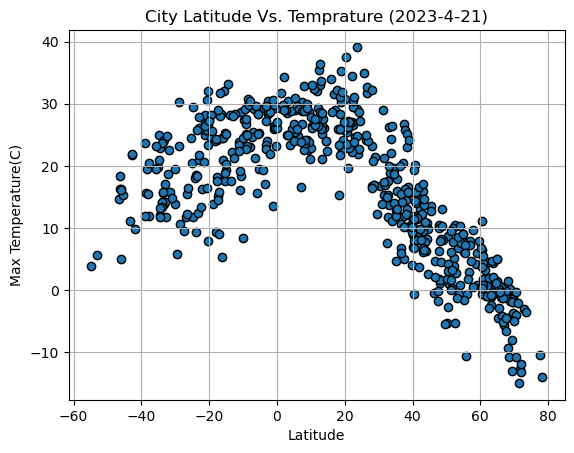

In [19]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

plt.scatter (city_data_df["Lat"], city_data_df["Max Temp"], edgecolor = "black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude Vs. Temprature (2023-4-21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.grid ()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

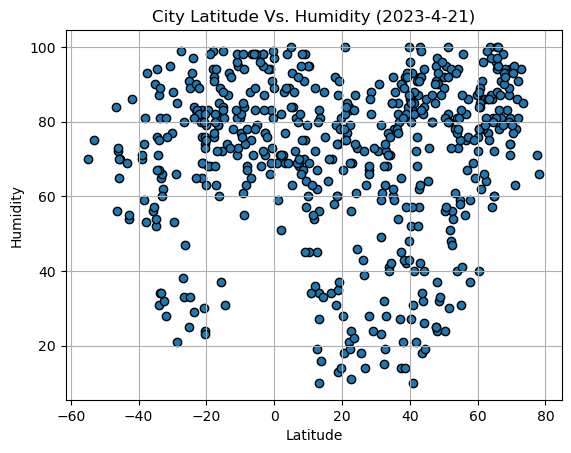

In [21]:
plt.scatter (city_data_df["Lat"], city_data_df["Humidity"], edgecolor = "black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude Vs. Humidity (2023-4-21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid ()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

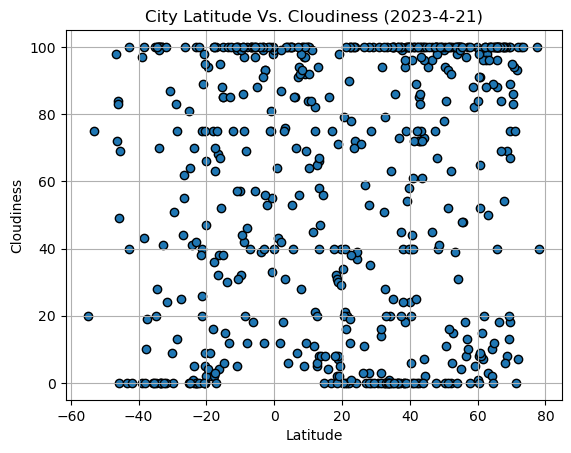

In [22]:
plt.scatter (city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor = "black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude Vs. Cloudiness (2023-4-21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid ()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

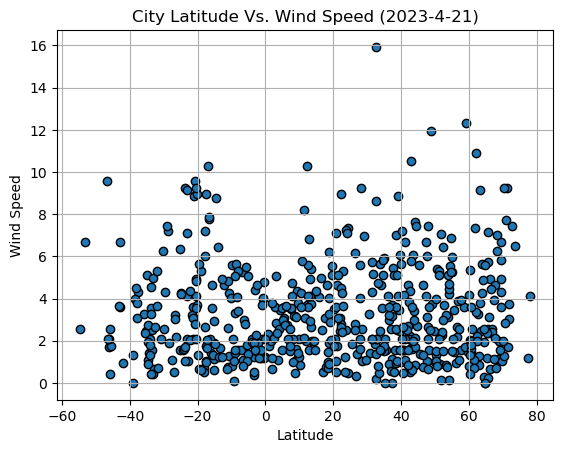

In [24]:
plt.scatter (city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor = "black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude Vs. Wind Speed (2023-4-21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid ()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Define a function to create Linear Regression plots
def f(x,y, xl, yl, pos):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq, pos,fontsize=15,color="red")
    plt.xlabel(xl)
    plt.ylabel(yl)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc [city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,greenwood,34.1668,-82.1165,19.60,71,20,4.63,US,1682136638
4,dubrovnik,42.6481,18.0922,14.80,62,0,0.51,HR,1682136638
5,qaanaaq,77.4840,-69.3632,-10.52,71,100,1.20,GL,1682136639
6,ploemeur,47.7333,-3.4333,10.46,91,100,1.03,FR,1682136639
7,nizhniy odes,63.6445,54.8560,0.27,100,100,2.46,RU,1682136640


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc [city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lae,-6.7221,146.9847,29.16,65,100,1.09,PG,1682136636
1,wairoa,-39.0333,177.3667,23.64,70,97,1.34,NZ,1682136637
2,vaini,-21.2000,-175.2000,27.09,65,40,3.60,TO,1682136637
8,faanui,-16.4833,-151.7500,28.31,79,68,7.77,PF,1682136640
10,katherine,-14.4667,132.2667,33.18,31,15,8.75,AU,1682136641


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.8234624482435211


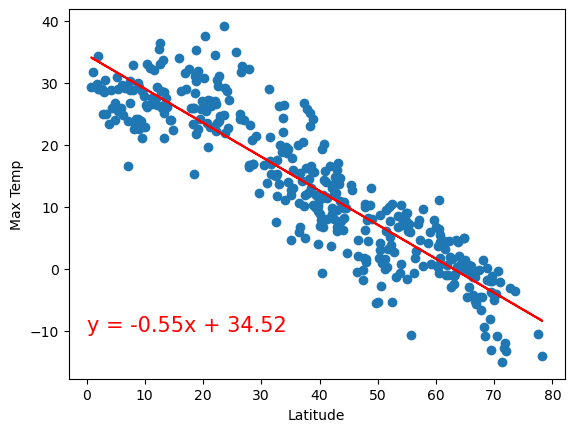

In [30]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
# x_values = northern_hemi_df['Lat']
# y_values = northern_hemi_df ['Max Temp']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(0,50),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Max Temp')
# print(f"The r-squared is: {rvalue**2}")
# plt.show()
f(northern_hemi_df['Lat'], northern_hemi_df ['Max Temp'], 'Latitude', 'Max Temp', (0,-10)  )

The r-squared is: 0.2897193932332274


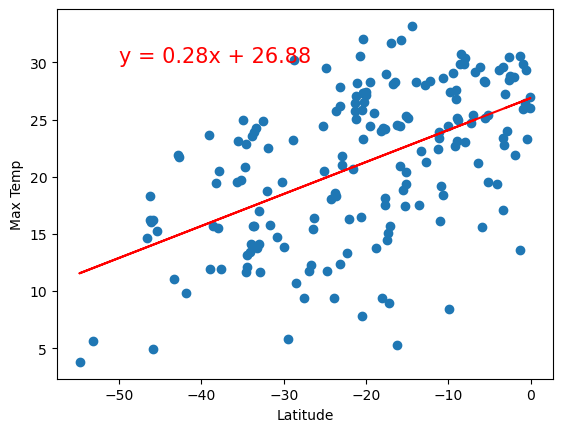

In [33]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
f(southern_hemi_df['Lat'], southern_hemi_df ['Max Temp'], 'Latitude', 'Max Temp', (-50,30)  )

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.04704488137852061


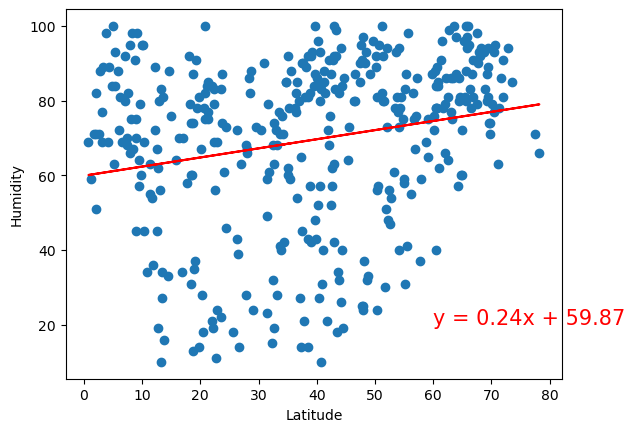

In [36]:
# Northern Hemisphere
# YOUR CODE HERE
f(northern_hemi_df['Lat'], northern_hemi_df ['Humidity'], 'Latitude', 'Humidity', (60,20)  )

The r-squared is: 0.1057759055124037


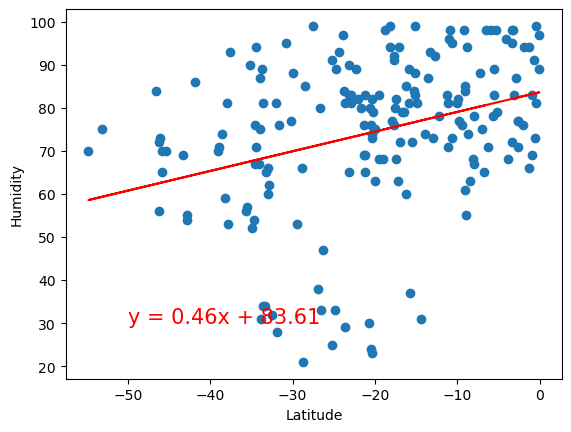

In [38]:
# Southern Hemisphere
# YOUR CODE HERE
f(southern_hemi_df['Lat'], southern_hemi_df ['Humidity'], 'Latitude', 'Humidity', (-50,30)  )

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.020537403481672337


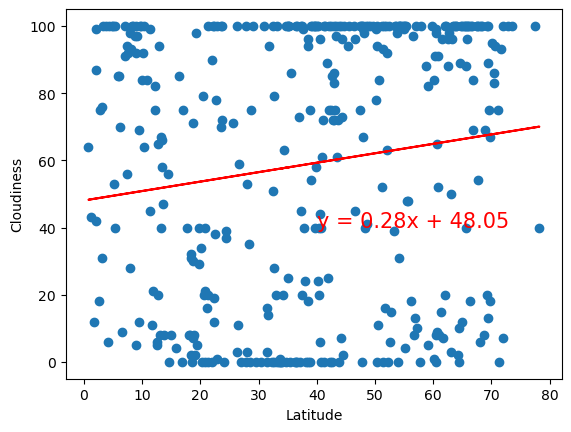

In [42]:
# Northern Hemisphere
# YOUR CODE HERE
f(northern_hemi_df['Lat'], northern_hemi_df ['Cloudiness'], 'Latitude', 'Cloudiness', (40,40)  )

The r-squared is: 0.050665088194106034


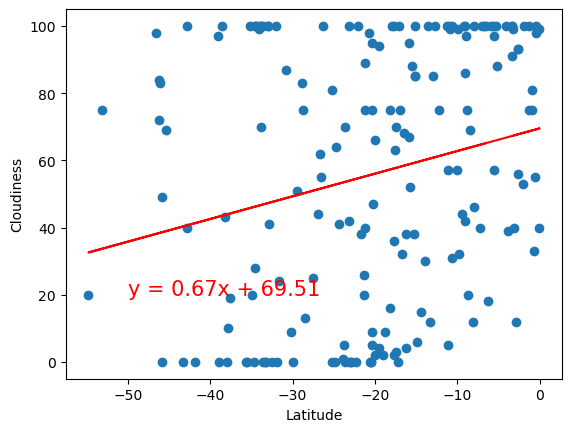

In [44]:
# Southern Hemisphere
# YOUR CODE HERE
f(southern_hemi_df['Lat'], southern_hemi_df ['Cloudiness'], 'Latitude', 'Cloudiness', (-50,20)  )

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0024468618895477617


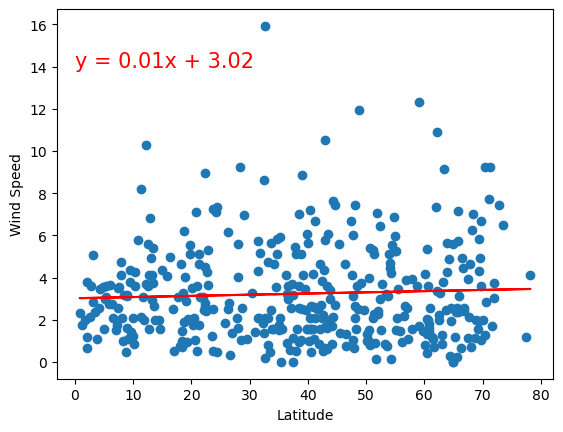

In [46]:
# Northern Hemisphere
# YOUR CODE HERE
f(northern_hemi_df['Lat'], northern_hemi_df ['Wind Speed'], 'Latitude', 'Wind Speed', (0,14)  )

The r-squared is: 0.006413468372113797


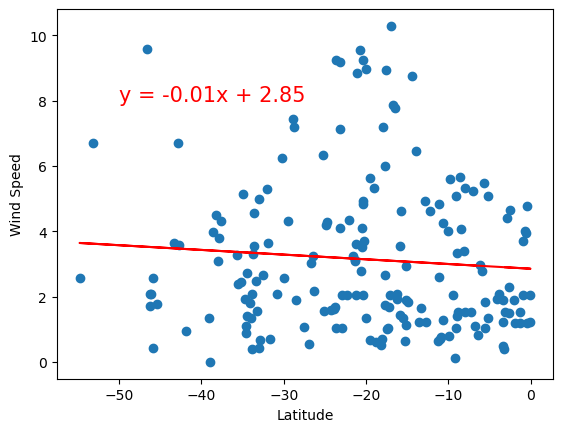

In [48]:
# Southern Hemisphere
# YOUR CODE HERE
f(southern_hemi_df['Lat'], southern_hemi_df ['Wind Speed'], 'Latitude', 'Wind Speed', (-50,8)  )

**Discussion about the linear relationship: The only significant relationship is between temperature and latitude all the other factors are insignificant with very small r-squared 